# Breast Cancer_XGBoost pipeline


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor


df = pd.read_csv("/Volumes/DriveA/iLab_work/cervical_cancer/Breast_Cancer_Participants.csv")



In [2]:
df

,State_and_territory,SA3_name,Year,Age_group,Participants
0,NSW,Queanbeyan,2018,50–54,1285
1,NSW,Queanbeyan,2018,55–59,1260
2,NSW,Queanbeyan,2018,60–64,1048
3,NSW,Queanbeyan,2018,65–69,855
4,NSW,Queanbeyan,2018,70–74,600
...,...,...,...,...,...
7051,NT,Katherine,2020,60–64,88
7052,NT,Katherine,2020,65–69,66
7053,NT,Katherine,2020,70–74,38
7054,NT,Katherine,2020,50–69,375


In [22]:
selected_columns = ['State_and_territory','SA3_name','Year','Age_group','Participants'] 

df1 = df[selected_columns]

In [23]:
df1.isna().sum()

State_and_territory    0
SA3_name               0
Year                   0
Age_group              0
Participants           0
dtype: int64

In [24]:
df1.fillna({'Age_group': '60-64'}, inplace=True)


In [25]:
# Split the data into features and target variable
X = df1.drop(['Participants'], axis=1)
y = df1['Participants']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
categorical_features = ['State_and_territory','SA3_name','Year','Age_group']
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
   ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [27]:
# Create XGBoost pipeline
XGBR_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', XGBRegressor())])

# Train the pipeline
XGBR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State_and_territory',
                                                   'SA3_name', 'Year',
                                                   'Age_group'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsampl...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [28]:
y_pred_train = XGBR_pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
median_train = median_absolute_error(y_train, y_pred_train)

print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Median Absolute Error:", median_train)

Mean Absolute Error: 541.3141655614409
Mean Squared Error: 645748.0555998841
Median Absolute Error: 279.44403076171875


In [29]:
# Make predictions on the testing set
y_pred = XGBR_pipeline.predict(X_test)

Mean Absolute Error: 583.5016543358648
Mean Squared Error: 830563.4985729925
Median Absolute Error: 292.5101013183594


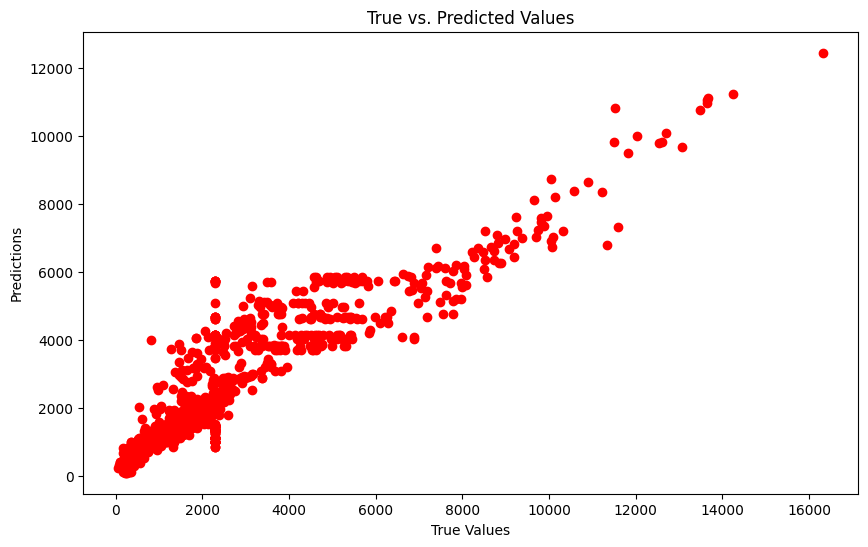

In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
median = median_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Median Absolute Error:", median)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='Red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()

In [31]:
from joblib import dump
dump(XGBR_pipeline,  "/Volumes/DriveA/iLab_work/cervical_cancer/Breast_Cancer_Participants_XGBRegressor.joblib")

['/Volumes/DriveA/iLab_work/cervical_cancer/Breast_Cancer_Participants_XGBRegressor.joblib']

## EDA

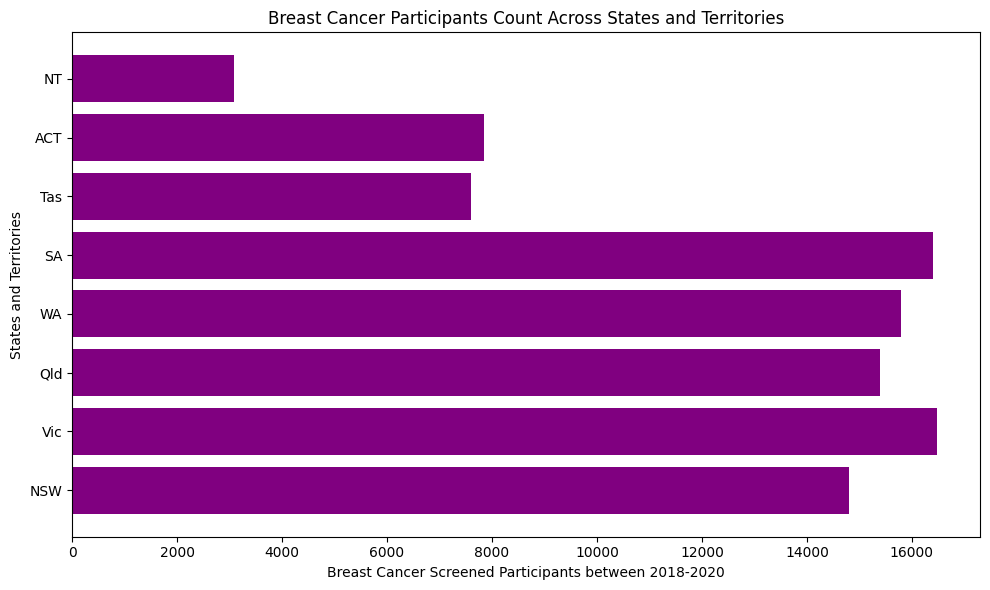

In [9]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df["State_and_territory"], df["Participants"], color='purple')
plt.xlabel('Breast Cancer Screened Participants between 2018-2020')
plt.ylabel('States and Territories')
plt.title('Breast Cancer Participants Count Across States and Territories')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()